In [1]:
import torch
from PIL import Image
from IPython import display

import pandas as pd
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:
#load the model from the pytorch hub
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', weights='MobileNet_V2_Weights.DEFAULT', verbose=False)

# Put model in evaluation mode
model.eval()

# put the model on a GPU if available, otherwise CPU
model.to(device);

In [3]:
# Define the transforms for preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),  # Resize the image to 256x256
    transforms.CenterCrop(224),  # Crop the image to 224x224 about the center
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # Normalize the image with the ImageNet dataset mean values
        std=[0.229, 0.224, 0.225]  # Normalize the image with the ImageNet dataset standard deviation values
    )
]);

In [4]:
unnormalize = transforms.Normalize(
   mean= [-m/s for m, s in zip([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])],
   std= [1/s for s in [0.229, 0.224, 0.225]]
)

In [5]:
def tensor_to_pil(img_tensor):
    # tensor: pre-processed tensor object resulting from preprocess(img).unsqueeze(0)
    unnormed_tensor = unnormalize(img_tensor)
    return transforms.functional.to_pil_image(unnormed_tensor[0])

In [6]:
# load labels
with open("../data/labels.txt", 'r') as f:
    labels = [label.strip() for label in f.readlines()]

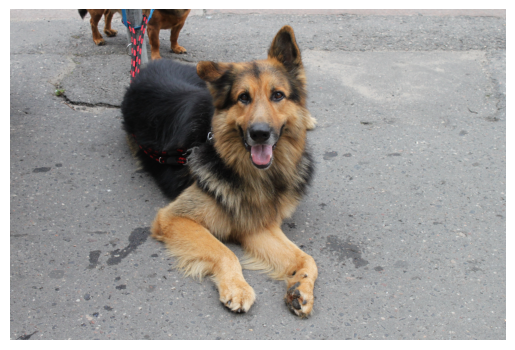

In [7]:
# load an example image
img = Image.open("../data/dog.jpg")

plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
# preprocess the image
img_tensor = preprocess(img).unsqueeze(0)

print(f"Inputs information:\n---------------\nshape:{img_tensor.shape}\n")

Inputs information:
---------------
shape:torch.Size([1, 3, 224, 224])



In [9]:
# move sample to the right device
img_tensor = img_tensor.to(device)

with torch.no_grad():
    output = model(img_tensor)

In [10]:
print(f"Image tensor on device:\n---------------\n{img_tensor.device}\n")
print(f"Inputs information:\n---------------\nshape:{img_tensor.shape}\nclass: {type(img_tensor)}\n")
print(f"Shape of outputs:\n---------------\n{output.shape}\n")
print(f"Pred Index:\n---------------\n{output[0].argmax()}\n")
print(f"Pred Label:\n---------------\n{labels[output[0].argmax()]}\n")

Image tensor on device:
---------------
cpu

Inputs information:
---------------
shape:torch.Size([1, 3, 224, 224])
class: <class 'torch.Tensor'>

Shape of outputs:
---------------
torch.Size([1, 1000])

Pred Index:
---------------
235

Pred Label:
---------------
German shepherd



In [11]:
queries = 1000
target_output = 235
output_index = 1000

In [12]:
i = 0

max_val = torch.max(img_tensor)
min_val = torch.min(img_tensor)
modifier = max_val - min_val

while not output_index == target_output:
    tensor = torch.randn(3, 224, 224).to(device) * modifier + min_val
    tensor = tensor.unsqueeze(0).to(device)
    output = model(tensor)
    output_index = output[0].argmax()
    output_label = labels[output_index]
    i += 1
    if i%50 == 1:
        print(output_index,output_label)
    if i == queries:
        break
print(output_index,output_label) # print every 50th iteration to see progress

tensor(599) honeycomb
tensor(599) honeycomb
tensor(599) honeycomb
tensor(599) honeycomb
tensor(599) honeycomb
tensor(490) chain mail
tensor(599) honeycomb
tensor(490) chain mail
tensor(490) chain mail
tensor(599) honeycomb
tensor(599) honeycomb
tensor(599) honeycomb
tensor(599) honeycomb
tensor(556) fire screen
tensor(490) chain mail
tensor(490) chain mail
tensor(599) honeycomb
tensor(599) honeycomb
tensor(599) honeycomb
tensor(490) chain mail
tensor(599) honeycomb
